Example notebook for running the scripted ICA.

In [2]:
from astropy.io import fits
import sys
sys.path.append("/Users/trevormccaffrey/Dropbox/ICA_module/code_main/")
#sys.path.append("/Users/Trevor1/Dropbox/ICA_module/")
import run_ICA_r20_components
sys.path.append("/Users/trevormccaffrey/Dropbox/HST/HSTCode/")
import Cut_Edge_Pix_TVM
import Small_Pix_Filter_TVM
import spec_morph
import plot_ICA
import matplotlib.pyplot as plt
import numpy as np

First test on a $z\sim2$ SDSS quasar.  This is the "base case" that should definitely work!

In [3]:
!ls

icascript_example.ipynb
icascript_preprocess_example-Copy1.ipynb
icascript_preprocess_example.ipynb
icascript_rebin.ipynb
icascript_wrebin_test.ipynb


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


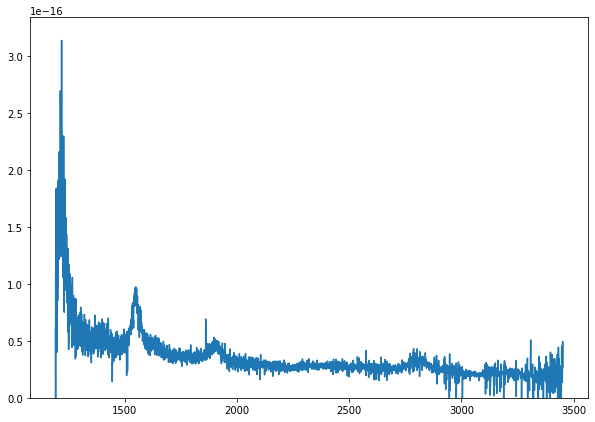

In [6]:
spec = fits.open("../data/spec-6715-56449-0294.fits")
zSDSS = 1.99703

waveSDSS = 10.**spec[1].data["LOGLAM"] / (1+zSDSS)
fluxSDSS = spec[1].data["FLUX"] * 10**-17
errsSDSS = 1. / np.sqrt(spec[1].data["IVAR"]) * 10**-17
maskSDSS = spec[1].data["AND_MASK"]

fig = plt.figure(figsize=(10,7))
plt.plot(waveSDSS, fluxSDSS)
plt.ylim(0,None)
plt.show()

In [8]:
resolution = [3.e5*((waveSDSS[i+1]-waveSDSS[i])/waveSDSS[i]) for i in range(len(waveSDSS)-1)]
round(np.median(resolution)), resolution

(69,
 [69.18277067597955,
  69.01318120071664,
  69.15091071277857,
  69.01212473167107,
  69.02695895405486,
  69.164574961178,
  69.02586319483817,
  69.19409497641027,
  69.0247499733232,
  69.16222628206015,
  69.02362802065909,
  69.00775479152799,
  69.17578139109537,
  69.00661974214017,
  69.20519663253799,
  69.00546723045409,
  69.17332793818787,
  69.00431035319343,
  69.01904853293672,
  69.18677390785888,
  69.01785673107952,
  69.18549916008487,
  69.01665183249861,
  69.1842069500126,
  68.98486608406529,
  69.03012399561703,
  69.16699785506353,
  69.028879806865,
  69.19622101122513,
  68.99708532728255,
  69.1948807798326,
  68.99582804180682,
  69.01047454448417,
  69.17761056683958,
  69.03968460392207,
  69.17623977642506,
  69.00789012433961,
  69.17486025486141,
  69.00658045196906,
  69.02117020217702,
  69.18800936546177,
  69.01982997078449,
  69.15614503668621,
  69.01848100824282,
  69.18515427969396,
  69.01711458340287,
  69.00124135427177,
  69.1981986165

In [4]:
flux_arb, errs_arb, wave_ica, flux_ica, f2500_ica = run_ICA_r20_components.main_ICA(waveSDSS, fluxSDSS, errsSDSS, 
                                                                          maskSDSS, zSDSS, name="", 
                                        ica_path="/Users/trevormccaffrey/Dropbox/ICA_module/components/")

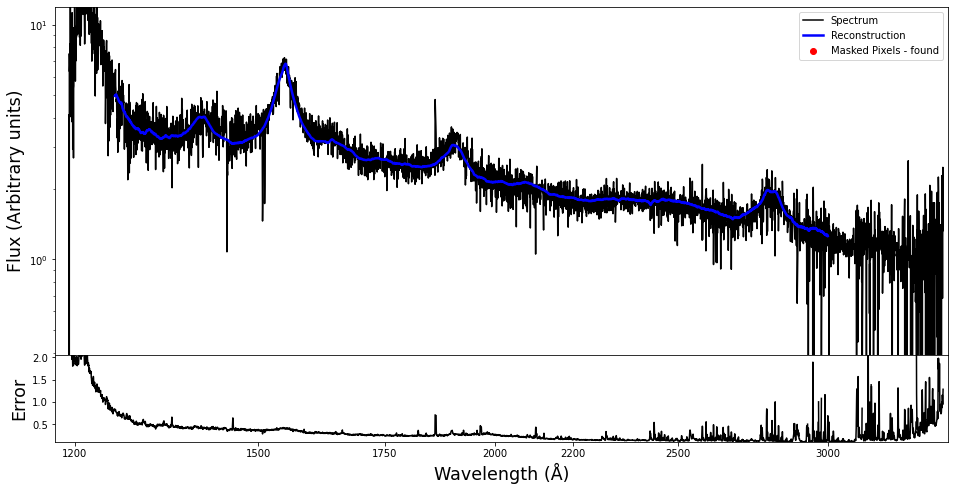

In [5]:
plot_ICA.spec_wreconstruction(waveSDSS, flux_arb, errs_arb, maskSDSS, wave_ica, flux_ica)

In [6]:
f2500_ica

2.849191960478146e-17

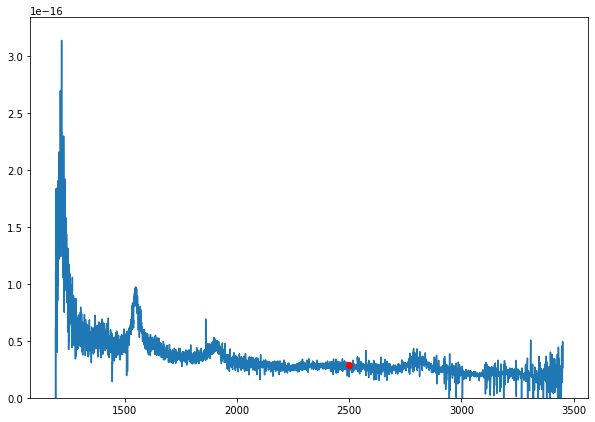

In [8]:
fig = plt.figure(figsize=(10,7))
plt.plot(waveSDSS, fluxSDSS)
plt.scatter(2500, f2500_ica, color="r", zorder=3)
plt.ylim(0,None)
plt.show()